# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [1]:
# Replace None with your code
# Imports
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Create connection to database
con = sqlite3.connect("data.sqlite")

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [2]:
# Replace None with your code
# Query California customers with high credit limit
california_high_credit = pd.read_sql('''
    SELECT customerNumber, CustomerName, phone, city, state, creditLimit  
    FROM customers
    WHERE state = 'CA' AND creditLimit > 25000;
''', con)

# Display the result
california_high_credit


,customerNumber,customerName,phone,city,state,creditLimit
0,124,Mini Gifts Distributors Ltd.,4155551450,San Rafael,CA,210500.00
1,129,Mini Wheels Co.,6505555787,San Francisco,CA,64600.00
2,161,Technics Stores Inc.,6505556809,Burlingame,CA,84600.00
3,205,Toys4GrownUps.com,6265557265,Pasadena,CA,90700.00
4,219,Boards & Toys Co.,3105552373,Glendale,CA,11000.00
5,239,Collectable Mini Designs Co.,7605558146,San Diego,CA,105000.00
6,321,Corporate Gift Ideas Co.,6505551386,San Francisco,CA,105000.00
7,347,"Men 'R' US Retailers, Ltd.",2155554369,Los Angeles,CA,57700.00
8,450,The Sharp Gifts Warehouse,4085553659,San Jose,CA,77600.00
9,475,West Coast Collectables Co.,3105553722,Burbank,CA,55400.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [3]:
# Replace None with your code
# International customers with 'Collect' in their name
international_collect_customers = pd.read_sql('''
    SELECT *
    FROM customers
    WHERE country != 'USA'
      AND customerName LIKE '%Collect%';
''', con)

# Display results
international_collect_customers.head()

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300.00
1,189,"Clover Collections, Co.",Cassidy,Dean,+353 1862 1555,25 Maiden Lane,Floor No. 4,Dublin,,2,Ireland,1504,69400.00
2,201,"UK Collectables, Ltd.",Devon,Elizabeth,(171) 555-2282,"12, Berkeley Gardens Blvd",,Liverpool,,WX1 6LT,UK,1501,92700.00
3,211,"King Kong Collectables, Co.",Gao,Mike,+852 2251 1555,Bank of China Tower,1 Garden Road,Central Hong Kong,,,Hong Kong,1621,58600.00
4,227,Heintze Collectables,Ibsen,Palle,86 21 3555,Smagsloget 45,,Århus,,8200,Denmark,1401,120800.00


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!

In my query, I used a WHERE clause to make sure we only select the customers that match the international sales rep team’s request. I applied two filters:

The customer must be from a country other than the United States, so we only focus on international clients.

The customer name must contain the word “Collect”, which ties directly into the theme of the “Collectable” campaign.

These conditions work together to ensure we are only selecting customers who are a strong fit for the campaign — international partners with relevant branding in their customer name

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [4]:
# Replace None with your code
usa_credit_by_state = pd.read_sql('''
    SELECT state, AVG(creditLimit) AS avg_credit_limit
    FROM customers
    WHERE country = 'USA'
    GROUP BY state
    ORDER BY avg_credit_limit DESC;
''', con)

usa_credit_by_state.head()

,state,avg_credit_limit
0,NH,114200.000000
1,NY,89966.666667
2,PA,84766.666667
3,CA,83854.545455
4,NV,71800.000000


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

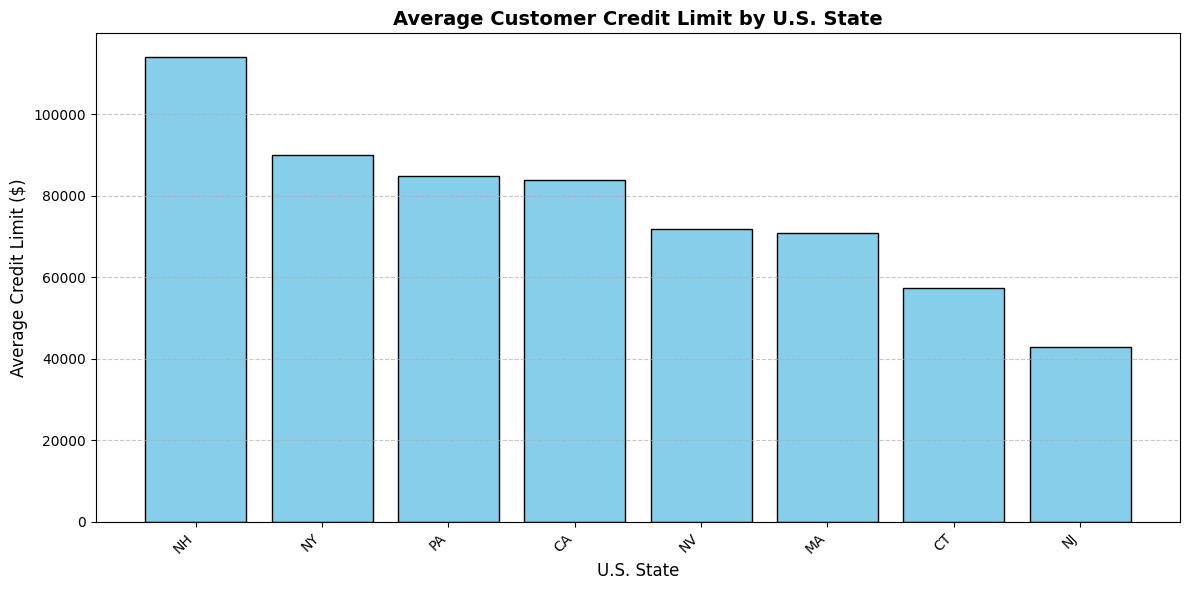

In [5]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
# Create a vertical bar chart
plt.figure(figsize=(12, 6))
plt.bar(usa_credit_by_state['state'], usa_credit_by_state['avg_credit_limit'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel("Average Credit Limit ($)", fontsize=12)
plt.xlabel("U.S. State", fontsize=12)
plt.title("Average Customer Credit Limit by U.S. State", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [6]:
# Replace None with your code
# SQL query to get top 10 customers by total payments
top_10_customers = pd.read_sql('''
    SELECT c.customerName, SUM(p.amount) AS total_payments
    FROM payments p
    JOIN customers c ON p.customerNumber = c.customerNumber
    GROUP BY c.customerName
    ORDER BY total_payments DESC
    LIMIT 10;
''', con)

top_10_customers

,customerName,total_payments
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

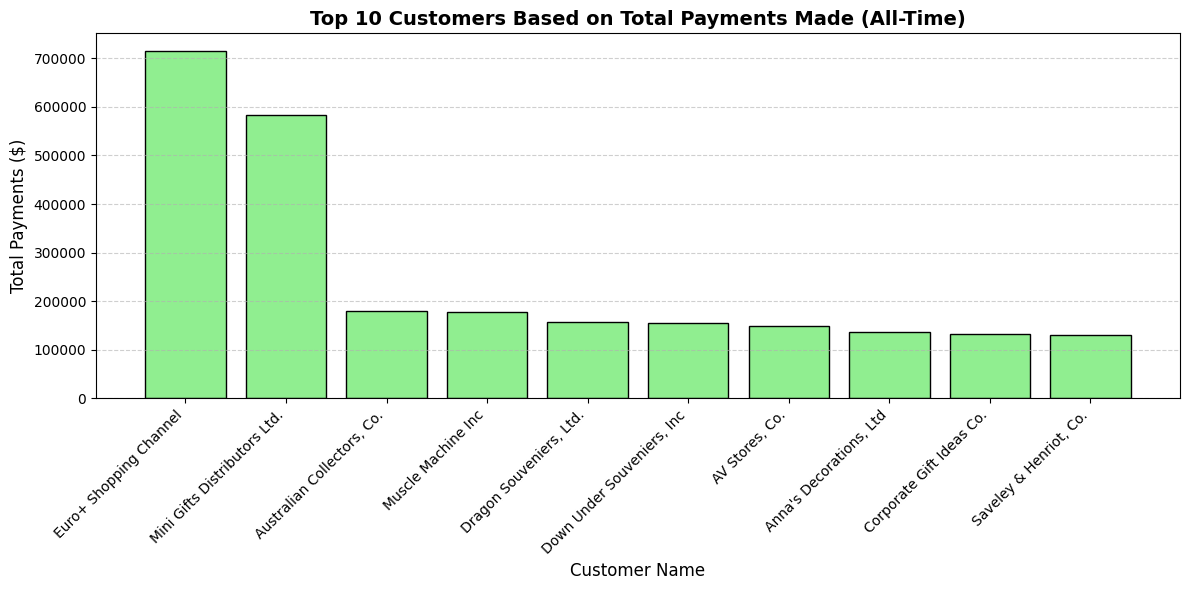

In [7]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
# Create vertical bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_customers['customerName'], top_10_customers['total_payments'], color='lightgreen', edgecolor='black')

# Add verbose title and axis labels
plt.title("Top 10 Customers Based on Total Payments Made (All-Time)", fontsize=14, weight='bold')
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Total Payments ($)", fontsize=12)

# Format x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [8]:
# Replace None with you code
# SQL query to retrieve customer-product combinations
# where total quantity ordered >= 10,
# and sort by total dollar amount (quantity * priceEach)
customer_product_amount = pd.read_sql('''
    SELECT c.customerName,
           od.productCode,
           SUM(od.quantityOrdered) AS total_quantity,
           SUM(od.quantityOrdered * od.priceEach) AS total_amount
    FROM orderdetails od
    JOIN orders o ON od.orderNumber = o.orderNumber
    JOIN customers c ON o.customerNumber = c.customerNumber
    GROUP BY c.customerName, od.productCode
    HAVING total_quantity >= 10
    ORDER BY total_amount ASC;
''', con)

# Display the result
customer_product_amount

,customerName,productCode,total_quantity,total_amount
0,Salzburg Collectables,S24_2972,15,481.50
1,Souveniers And Things Co.,S24_3969,15,529.35
2,Online Diecast Creations Co.,S24_1937,20,531.00
3,La Rochelle Gifts,S32_2509,11,553.52
4,Marseille Mini Autos,S24_1937,20,557.60
...,...,...,...,...
2526,Mini Gifts Distributors Ltd.,S18_2238,123,18780.28
2527,Euro+ Shopping Channel,S24_3856,161,21047.69
2528,Mini Gifts Distributors Ltd.,S12_3891,137,21811.12
2529,Mini Gifts Distributors Ltd.,S12_1108,140,24098.63


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [9]:
# Replace None with your code
# Product line analysis
productline_analysis = pd.read_sql('''
    SELECT p.productLine,
           COUNT(DISTINCT p.productCode) AS num_products,
           SUM(od.quantityOrdered) AS total_quantity_ordered
    FROM products p
    JOIN orderdetails od ON p.productCode = od.productCode
    GROUP BY p.productLine
    ORDER BY total_quantity_ordered DESC;
''', con)

# Display the result
productline_analysis.head()

,productLine,num_products,total_quantity_ordered
0,Classic Cars,37,35582
1,Vintage Cars,24,22933
2,Motorcycles,13,12778
3,Planes,12,11872
4,Trucks and Buses,11,11001


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

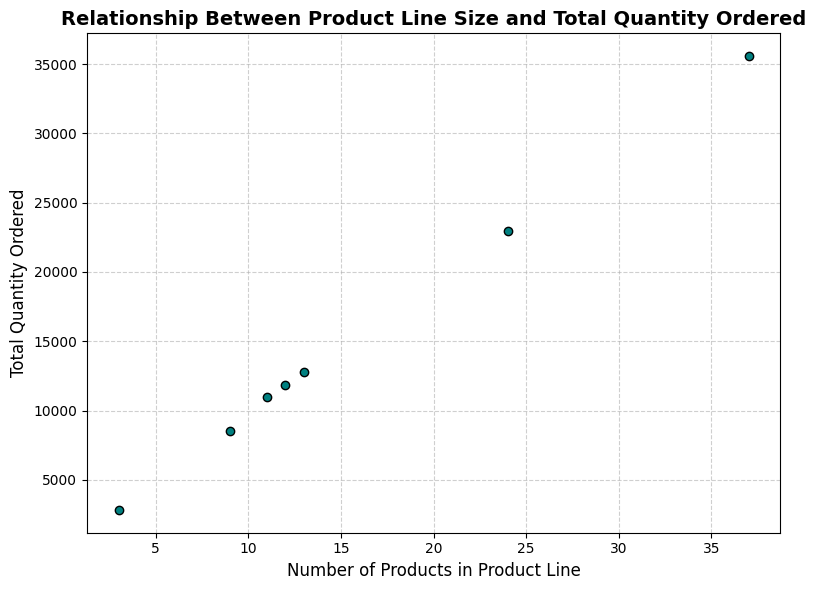

In [10]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
# Create scatter plot to show relationship between number of products and total quantity ordered
plt.figure(figsize=(8, 6))
plt.scatter(productline_analysis['num_products'], productline_analysis['total_quantity_ordered'], color='teal', edgecolor='black')

# Add labels and title
plt.xlabel("Number of Products in Product Line", fontsize=12)
plt.ylabel("Total Quantity Ordered", fontsize=12)
plt.title("Relationship Between Product Line Size and Total Quantity Ordered", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer in markdown here!

I chose a scatter plot because it’s a simple way to show how two numbers relate — here, the number of products in each line and how many units were ordered. Each dot stands for one product line. 

If the dots trend upward together, it suggests that having more products usually leads to more sales (a positive relationship), and in this chart, we do observe that pattern. If the dots were scattered without direction, it would suggest that greater variety doesn't necessarily lead to higher demand.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [11]:
# Replace None with your code
# SQL query to find employees in offices with fewer than 5 employees
employees_in_small_offices = pd.read_sql('''
    SELECT e.employeeNumber,
           e.firstName,
           e.lastName,
           e.email,
           e.jobTitle,
           e.reportsTo,
           e.officeCode
    FROM employees e
    WHERE e.officeCode IN (
        SELECT officeCode
        FROM employees
        GROUP BY officeCode
        HAVING COUNT(*) < 5
    )
    ORDER BY e.officeCode, e.employeeNumber;
''', con)

# Display result
employees_in_small_offices.head()

,employeeNumber,firstName,lastName,email,jobTitle,reportsTo,officeCode
0,1188,Julie,Firrelli,jfirrelli@classicmodelcars.com,Sales Rep,1143,2
1,1216,Steve,Patterson,spatterson@classicmodelcars.com,Sales Rep,1143,2
2,1286,Foon Yue,Tseng,ftseng@classicmodelcars.com,Sales Rep,1143,3
3,1323,George,Vanauf,gvanauf@classicmodelcars.com,Sales Rep,1143,3
4,1621,Mami,Nishi,mnishi@classicmodelcars.com,Sales Rep,1056,5


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!

I used a subquery to first identify which offices have fewer than 5 employees by grouping the employees table by officeCode and applying a HAVING COUNT(*) < 5 condition. This subquery returns only those office codes. Then, in the main query, I used WHERE officeCode IN (...) to filter employees working in those offices. This ensures the final result includes only employees from small offices.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [12]:
# Replace None with your code
con.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [13]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

Dataset Preparation

In [14]:
# Load movies from 2010 to 2019, excluding null runtime and genres
movies_filtered = pd.read_sql("""
    SELECT 
        mb.movie_id,
        mb.primary_title,
        mb.start_year,
        mb.runtime_minutes,
        mb.genres,
        mr.averagerating,
        mr.numvotes
    FROM movie_basics mb
    JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
    WHERE mb.start_year BETWEEN 2010 AND 2019
      AND mb.runtime_minutes IS NOT NULL
      AND mb.genres IS NOT NULL
""", conn4)

movies_filtered.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [15]:
# Step 1C: Explode genres and compute stats
movies_exploded = movies_filtered.copy()
movies_exploded['genre'] = movies_exploded['genres'].str.split(',')
movies_exploded = movies_exploded.explode('genre')

# Group by genre
genre_summary = movies_exploded.groupby('genre').agg(
    avg_rating=('averagerating', 'mean'),
    total_votes=('numvotes', 'sum'),
    num_movies=('movie_id', 'count')
).reset_index()

# Sort by average rating
genre_summary = genre_summary.sort_values(by='avg_rating', ascending=False)

# Show top genres
genre_summary.head(10)

,genre,avg_rating,total_votes,num_movies
21,Short,8.800000,8,1
7,Documentary,7.316787,4709902,16423
11,Game-Show,7.300000,3469,2
17,News,7.278783,123284,575
4,Biography,7.169185,21603178,3693
14,Music,7.070662,5449664,1844
12,History,7.048928,7837499,2704
22,Sport,6.964604,3750284,1099
18,Reality-TV,6.600000,394,13
24,War,6.573962,2682706,795


Business Question:
“Do less frequent genres tend to receive higher average ratings than more popular genres?”

In [16]:
# Data Cleaning Assessment (using code to inspect issues)

# 1. Check for nulls in key fields
null_summary = movies_filtered.isnull().sum()

# 2. Check vote count distribution to spot low-vote movies
vote_stats = movies_filtered['numvotes'].describe()

# 3. Check for extremely low or high runtimes
runtime_stats = movies_filtered['runtime_minutes'].describe()

# 4. Count how many movies have fewer than 100 votes (potential noise)
low_vote_count = (movies_filtered['numvotes'] < 100).sum()

# Display results
null_summary, vote_stats, runtime_stats, low_vote_count

(movie_id           0
 primary_title      0
 start_year         0
 runtime_minutes    0
 genres             0
 averagerating      0
 numvotes           0
 dtype: int64,
 count    6.572000e+04
 mean     3.954674e+03
 std      3.208823e+04
 min      5.000000e+00
 25%      1.600000e+01
 50%      6.200000e+01
 75%      3.520000e+02
 max      1.841066e+06
 Name: numvotes, dtype: float64,
 count    65720.000000
 mean        94.732273
 std        209.377017
 min          3.000000
 25%         81.000000
 50%         91.000000
 75%        104.000000
 max      51420.000000
 Name: runtime_minutes, dtype: float64,
 37755)

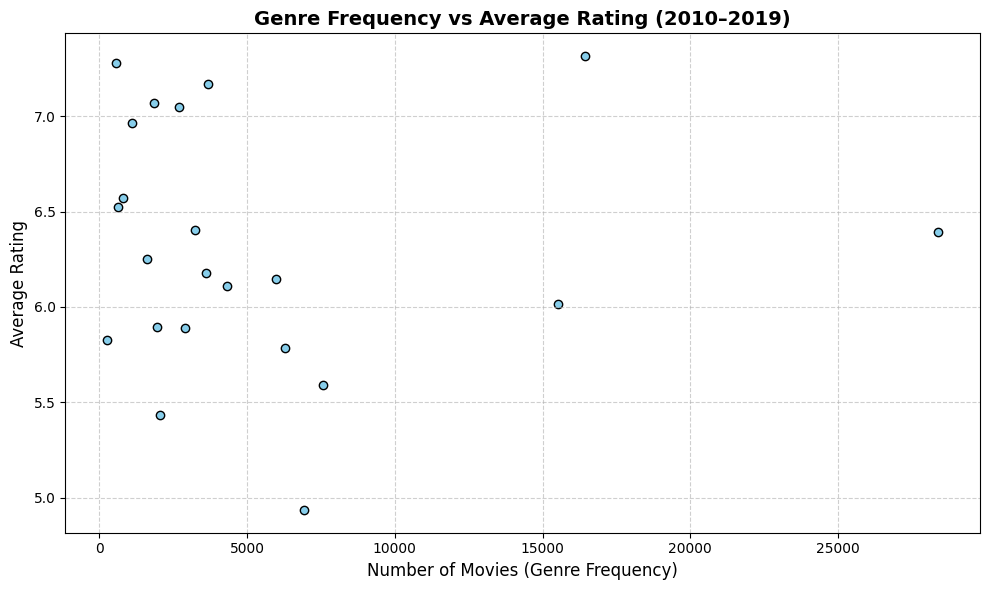

In [17]:
# Limit to genres with at least 50 movies for more reliable comparison
filtered_genres = genre_summary[genre_summary['num_movies'] >= 50]

# Sort by number of movies for clarity
filtered_genres = filtered_genres.sort_values(by='num_movies', ascending=False)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_genres['num_movies'], filtered_genres['avg_rating'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Number of Movies (Genre Frequency)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Genre Frequency vs Average Rating (2010–2019)", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

In [18]:
conn4.close()